In [1]:
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [131]:
a=pd.read_excel('객단가.xlsx')#,encoding='cp949'
a

,고객번호,1기객단가,2기객단가,3기객단가,4기객단가,5기객단가,6기객단가,7기기객단가,1_2증감,2_3증감,3_4증감,4_5증감,5_6증감,6_7증감,객단가변동률
0,1,2,1,2,1,2,2,1,-1,1,-1,1,0,-1,5
1,2,2,2,1,3,1,2,1,0,-1,2,-2,1,-1,7
2,3,10,10,10,10,10,10,10,0,0,0,0,0,0,0
3,4,5,4,3,4,5,5,4,-1,-1,1,1,0,-1,5
4,6,6,5,4,5,5,4,4,-1,-1,1,0,-1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,9,9,8,10,8,7,8,0,-1,2,-2,-1,1,7
18862,19334,8,9,9,7,7,9,5,1,0,-2,0,2,-4,9
18863,19335,6,6,6,7,7,5,7,0,0,1,0,-2,2,5
18864,19336,2,3,3,2,3,1,1,1,0,-1,1,-2,0,5


In [132]:
a2 = a.drop(['1기객단가','2기객단가','3기객단가','4기객단가','5기객단가','6기객단가','7기기객단가'],axis=1)

In [117]:
# a1 = a[['고객번호','객단가변동률']]

In [133]:
import pandas as pd

df=pd.read_csv('3.22.csv',encoding='cp949')
df

,Unnamed: 0,고객번호,성별,연령대,거주지역,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,1번품목구매비율(%),2번품목구매비율(%),...,D번제휴사구매비율(%),A_구매횟수,B_구매횟수,C_구매횟수,D_구매횟수,A_총구매액,B_총구매액,C_총구매액,D_총구매액,분기증감확인
0,0,1,1,5,1,15.0,0.0,0.0,2.86,27.70,...,0.00,874.0,64.0,119.0,0.0,1.0,7.0,3.0,4.0,0
1,1,2,1,5,0,8.0,0.0,0.0,3.64,36.73,...,9.90,1080.0,16.0,0.0,20.0,1.0,8.0,10.0,1.0,0
2,2,3,1,5,0,0.0,0.0,0.0,4.47,95.53,...,0.00,1.0,2.0,1188.0,0.0,10.0,10.0,3.0,8.0,0
3,3,4,0,5,1,3.0,0.0,0.0,2.72,26.13,...,0.00,649.0,126.0,155.0,0.0,4.0,6.0,4.0,8.0,0
4,4,6,0,5,3,0.0,0.0,0.0,4.99,45.59,...,0.00,361.0,1193.0,39.0,0.0,4.0,3.0,4.0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,18861,19333,0,1,0,0.0,1.0,5.0,15.53,55.08,...,50.17,427.0,302.0,11.0,84.0,6.0,7.0,7.0,1.0,0
18862,18862,19334,1,2,3,30.0,1.0,0.0,13.88,66.70,...,0.00,3.0,1674.0,287.0,0.0,8.0,2.0,4.0,5.0,0
18863,18863,19335,0,2,0,0.0,1.0,0.0,16.72,53.31,...,0.00,10.0,1496.0,367.0,0.0,7.0,2.0,3.0,5.0,1
18864,18864,19336,0,2,1,0.0,0.0,0.0,10.66,30.64,...,8.74,434.0,1.0,0.0,5.0,3.0,10.0,9.0,1.0,1


In [28]:
df.columns

Index(['고객번호', '성별', '연령대', '거주지역', '1번품목구매비율(%)', '2번품목구매비율(%)',
       '3번품목구매비율(%)', '4번품목구매비율(%)', '경쟁사이용횟수', '멤버쉽보유', '온라인이용횟수',
       '1기구매비율(%)', '2기구매비율(%)', '3기구매비율(%)', '4기구매비율(%)', '5기구매비율(%)',
       '6기구매비율(%)', '7기구매비율(%)', '8기구매비율(%)', '분기증감확인'],
      dtype='object')

In [134]:
df=pd.read_csv('3.22.csv',encoding='cp949')
df

,Unnamed: 0,고객번호,성별,연령대,거주지역,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,1번품목구매비율(%),2번품목구매비율(%),...,D번제휴사구매비율(%),A_구매횟수,B_구매횟수,C_구매횟수,D_구매횟수,A_총구매액,B_총구매액,C_총구매액,D_총구매액,분기증감확인
0,0,1,1,5,1,15.0,0.0,0.0,2.86,27.70,...,0.00,874.0,64.0,119.0,0.0,1.0,7.0,3.0,4.0,0
1,1,2,1,5,0,8.0,0.0,0.0,3.64,36.73,...,9.90,1080.0,16.0,0.0,20.0,1.0,8.0,10.0,1.0,0
2,2,3,1,5,0,0.0,0.0,0.0,4.47,95.53,...,0.00,1.0,2.0,1188.0,0.0,10.0,10.0,3.0,8.0,0
3,3,4,0,5,1,3.0,0.0,0.0,2.72,26.13,...,0.00,649.0,126.0,155.0,0.0,4.0,6.0,4.0,8.0,0
4,4,6,0,5,3,0.0,0.0,0.0,4.99,45.59,...,0.00,361.0,1193.0,39.0,0.0,4.0,3.0,4.0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,18861,19333,0,1,0,0.0,1.0,5.0,15.53,55.08,...,50.17,427.0,302.0,11.0,84.0,6.0,7.0,7.0,1.0,0
18862,18862,19334,1,2,3,30.0,1.0,0.0,13.88,66.70,...,0.00,3.0,1674.0,287.0,0.0,8.0,2.0,4.0,5.0,0
18863,18863,19335,0,2,0,0.0,1.0,0.0,16.72,53.31,...,0.00,10.0,1496.0,367.0,0.0,7.0,2.0,3.0,5.0,1
18864,18864,19336,0,2,1,0.0,0.0,0.0,10.66,30.64,...,8.74,434.0,1.0,0.0,5.0,3.0,10.0,9.0,1.0,1


In [9]:
df.columns

Index(['Unnamed: 0', '고객번호', '성별', '연령대', '거주지역', '경쟁사이용횟수', '멤버쉽보유',
       '온라인이용횟수', '1번품목구매비율(%)', '2번품목구매비율(%)', '3번품목구매비율(%)', '4번품목구매비율(%)',
       '편의품구매횟수', '선매품구매횟수', '전문품구매횟수', '기타구매횟수', '편의품구매등급', '선매품구매등급',
       '전문품구매등급', '기타구매등급', '1기구매비율(%)', '2기구매비율(%)', '3기구매비율(%)', '4기구매비율(%)',
       '5기구매비율(%)', '6기구매비율(%)', '7기구매비율(%)', '8기구매비율(%)', '1기구매등급', '2기구매등급',
       '3기구매등급', '4기구매등급', '5기구매등급', '6기구매등급', '7기구매등급', '8기구매등급', '1기구매횟수',
       '2기구매횟수', '3기구매횟수', '4기구매횟수', '5기구매횟수', '6기구매횟수', '7기구매횟수', '8기구매횟수',
       'A제휴사구매비율(%)', 'B제휴사구매비율(%)', 'C제휴사구매비율(%)', 'D번제휴사구매비율(%)', 'A_구매횟수',
       'B_구매횟수', 'C_구매횟수', 'D_구매횟수', 'A_총구매액', 'B_총구매액', 'C_총구매액', 'D_총구매액',
       '분기증감확인'],
      dtype='object')

In [135]:
df1=pd.read_csv('RFM테이블.csv',encoding='cp949')
df1

,고객번호,총구매액,구매빈도,최근구매일
0,1,80397041.0,979,10
1,2,91717156.0,997,3
2,3,3037160.0,1098,10
3,4,15711888.0,823,2
4,6,22123951.0,1374,2
...,...,...,...,...
18861,19333,4339816.0,734,4
18862,19334,12106990.0,1916,33
18863,19335,15255492.0,1643,2
18864,19336,26592233.0,389,7


In [136]:
df3 = pd.merge(df,df1, on='고객번호')
df3

,Unnamed: 0,고객번호,성별,연령대,거주지역,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,1번품목구매비율(%),2번품목구매비율(%),...,C_구매횟수,D_구매횟수,A_총구매액,B_총구매액,C_총구매액,D_총구매액,분기증감확인,총구매액,구매빈도,최근구매일
0,0,1,1,5,1,15.0,0.0,0.0,2.86,27.70,...,119.0,0.0,1.0,7.0,3.0,4.0,0,80397041.0,979,10
1,1,2,1,5,0,8.0,0.0,0.0,3.64,36.73,...,0.0,20.0,1.0,8.0,10.0,1.0,0,91717156.0,997,3
2,2,3,1,5,0,0.0,0.0,0.0,4.47,95.53,...,1188.0,0.0,10.0,10.0,3.0,8.0,0,3037160.0,1098,10
3,3,4,0,5,1,3.0,0.0,0.0,2.72,26.13,...,155.0,0.0,4.0,6.0,4.0,8.0,0,15711888.0,823,2
4,4,6,0,5,3,0.0,0.0,0.0,4.99,45.59,...,39.0,0.0,4.0,3.0,4.0,8.0,1,22123951.0,1374,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,18861,19333,0,1,0,0.0,1.0,5.0,15.53,55.08,...,11.0,84.0,6.0,7.0,7.0,1.0,0,4339816.0,734,4
18862,18862,19334,1,2,3,30.0,1.0,0.0,13.88,66.70,...,287.0,0.0,8.0,2.0,4.0,5.0,0,12106990.0,1916,33
18863,18863,19335,0,2,0,0.0,1.0,0.0,16.72,53.31,...,367.0,0.0,7.0,2.0,3.0,5.0,1,15255492.0,1643,2
18864,18864,19336,0,2,1,0.0,0.0,0.0,10.66,30.64,...,0.0,5.0,3.0,10.0,9.0,1.0,1,26592233.0,389,7


In [137]:
df2=pd.read_csv('CV_대분류.csv',encoding='cp949')
df2

,Unnamed: 0,고객번호,편의품_CV_S,편의품_CV_C,선매품CV_S,선매품CV_C,전문품CV_S,전문품CV_C,기타CV_S,기타CV_C
0,0,1,0.423231,0.450363,0.415863,0.187114,1.356745,1.247219,0.491980,0.490667
1,1,2,0.404963,0.217903,0.395417,0.260345,2.099585,2.094437,1.196030,0.864521
2,2,3,0.355232,0.336062,1.945495,1.707825,0.000000,0.000000,0.000000,0.000000
3,3,4,0.267522,0.299495,0.539876,0.435087,2.645751,2.645751,0.615895,0.628138
4,4,6,0.336680,0.184807,0.255509,0.323405,1.282600,1.058301,0.237022,0.351850
...,...,...,...,...,...,...,...,...,...,...
18861,18861,19333,0.531012,0.433746,1.413875,1.466643,0.000000,0.000000,0.577843,0.269152
18862,18862,19334,0.710300,0.680638,1.111205,0.501125,0.000000,0.000000,1.097728,1.032669
18863,18863,19335,0.285949,0.294746,0.581560,0.482012,0.000000,0.000000,1.239736,0.426265
18864,18864,19336,1.110957,0.694073,0.582518,0.429805,1.398080,1.376893,0.570862,0.592007


In [138]:
df4=pd.read_csv('세분류_CV.csv',encoding='cp949')
df4

,Unnamed: 0,고객번호,생활잡화CV_S,생활잡화CV_C,식료품CV_S,식료품CV_C,고급식료품CV_S,고급식료품CV_C,기호품CV_S,기호품CV_C,...,레저취미CV_S,레저취미CV_C,전자제품CV_S,전자제품CV_C,도서음반CV_S,도서음반CV_C,차량용품CV_S,차량용품CV_C,사치품CV_S,사치품CV_C
0,0,1,1.540948,0.885654,0.373790,0.421108,1.703368,1.551209,1.066678,0.402776,...,1.628962,1.495363,2.013893,1.742835,0.000000,0.000000,0.000000,0.000000,1.356745,1.247219
1,1,2,1.108827,0.368856,0.289531,0.305696,2.055104,1.707825,1.018559,0.419877,...,0.509951,0.621027,1.202233,0.721569,0.000000,0.000000,0.000000,0.000000,2.099585,2.094437
2,2,3,0.624040,0.411024,0.468734,0.421179,0.000000,0.000000,0.313032,0.324466,...,0.000000,0.000000,2.645751,2.645751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,4,0.375034,0.361020,0.346428,0.317770,1.916112,1.707825,0.631667,0.627913,...,1.620152,1.290994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.645751,2.645751
4,4,6,0.441365,0.236272,0.359479,0.207556,1.826988,1.835857,1.295754,1.085715,...,2.315618,1.707825,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.282600,1.058301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,18861,19333,1.395795,1.163576,0.567128,0.482240,1.537699,1.557776,0.648542,0.534734,...,2.645751,2.645751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18862,18862,19334,0.691297,0.559001,0.745829,0.712778,1.313464,1.247219,1.212919,0.981428,...,0.978332,0.577350,2.645751,2.645751,1.270026,1.376893,2.645751,2.645751,0.000000,0.000000
18863,18863,19335,0.608691,0.394258,0.311870,0.302453,1.759287,1.247219,0.511910,0.425245,...,1.385985,0.847319,0.000000,0.000000,0.872815,0.810077,1.640665,1.376893,0.000000,0.000000
18864,18864,19336,1.381031,0.957427,1.170780,0.894427,2.645751,2.645751,2.022526,1.835857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.398080,1.376893


In [139]:
df3 = pd.merge(df3,df2, on='고객번호')
df3

,Unnamed: 0_x,고객번호,성별,연령대,거주지역,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,1번품목구매비율(%),2번품목구매비율(%),...,최근구매일,Unnamed: 0_y,편의품_CV_S,편의품_CV_C,선매품CV_S,선매품CV_C,전문품CV_S,전문품CV_C,기타CV_S,기타CV_C
0,0,1,1,5,1,15.0,0.0,0.0,2.86,27.70,...,10,0,0.423231,0.450363,0.415863,0.187114,1.356745,1.247219,0.491980,0.490667
1,1,2,1,5,0,8.0,0.0,0.0,3.64,36.73,...,3,1,0.404963,0.217903,0.395417,0.260345,2.099585,2.094437,1.196030,0.864521
2,2,3,1,5,0,0.0,0.0,0.0,4.47,95.53,...,10,2,0.355232,0.336062,1.945495,1.707825,0.000000,0.000000,0.000000,0.000000
3,3,4,0,5,1,3.0,0.0,0.0,2.72,26.13,...,2,3,0.267522,0.299495,0.539876,0.435087,2.645751,2.645751,0.615895,0.628138
4,4,6,0,5,3,0.0,0.0,0.0,4.99,45.59,...,2,4,0.336680,0.184807,0.255509,0.323405,1.282600,1.058301,0.237022,0.351850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,18861,19333,0,1,0,0.0,1.0,5.0,15.53,55.08,...,4,18861,0.531012,0.433746,1.413875,1.466643,0.000000,0.000000,0.577843,0.269152
18862,18862,19334,1,2,3,30.0,1.0,0.0,13.88,66.70,...,33,18862,0.710300,0.680638,1.111205,0.501125,0.000000,0.000000,1.097728,1.032669
18863,18863,19335,0,2,0,0.0,1.0,0.0,16.72,53.31,...,2,18863,0.285949,0.294746,0.581560,0.482012,0.000000,0.000000,1.239736,0.426265
18864,18864,19336,0,2,1,0.0,0.0,0.0,10.66,30.64,...,7,18864,1.110957,0.694073,0.582518,0.429805,1.398080,1.376893,0.570862,0.592007


In [140]:
df3 = pd.merge(df3,df4, on='고객번호')
df3

,Unnamed: 0_x,고객번호,성별,연령대,거주지역,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,1번품목구매비율(%),2번품목구매비율(%),...,레저취미CV_S,레저취미CV_C,전자제품CV_S,전자제품CV_C,도서음반CV_S,도서음반CV_C,차량용품CV_S,차량용품CV_C,사치품CV_S,사치품CV_C
0,0,1,1,5,1,15.0,0.0,0.0,2.86,27.70,...,1.628962,1.495363,2.013893,1.742835,0.000000,0.000000,0.000000,0.000000,1.356745,1.247219
1,1,2,1,5,0,8.0,0.0,0.0,3.64,36.73,...,0.509951,0.621027,1.202233,0.721569,0.000000,0.000000,0.000000,0.000000,2.099585,2.094437
2,2,3,1,5,0,0.0,0.0,0.0,4.47,95.53,...,0.000000,0.000000,2.645751,2.645751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,4,0,5,1,3.0,0.0,0.0,2.72,26.13,...,1.620152,1.290994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.645751,2.645751
4,4,6,0,5,3,0.0,0.0,0.0,4.99,45.59,...,2.315618,1.707825,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.282600,1.058301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,18861,19333,0,1,0,0.0,1.0,5.0,15.53,55.08,...,2.645751,2.645751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18862,18862,19334,1,2,3,30.0,1.0,0.0,13.88,66.70,...,0.978332,0.577350,2.645751,2.645751,1.270026,1.376893,2.645751,2.645751,0.000000,0.000000
18863,18863,19335,0,2,0,0.0,1.0,0.0,16.72,53.31,...,1.385985,0.847319,0.000000,0.000000,0.872815,0.810077,1.640665,1.376893,0.000000,0.000000
18864,18864,19336,0,2,1,0.0,0.0,0.0,10.66,30.64,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.398080,1.376893


In [141]:
df3 = pd.merge(df3,a2, on='고객번호')
df3

,Unnamed: 0_x,고객번호,성별,연령대,거주지역,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,1번품목구매비율(%),2번품목구매비율(%),...,차량용품CV_C,사치품CV_S,사치품CV_C,1_2증감,2_3증감,3_4증감,4_5증감,5_6증감,6_7증감,객단가변동률
0,0,1,1,5,1,15.0,0.0,0.0,2.86,27.70,...,0.000000,1.356745,1.247219,-1,1,-1,1,0,-1,5
1,1,2,1,5,0,8.0,0.0,0.0,3.64,36.73,...,0.000000,2.099585,2.094437,0,-1,2,-2,1,-1,7
2,2,3,1,5,0,0.0,0.0,0.0,4.47,95.53,...,0.000000,0.000000,0.000000,0,0,0,0,0,0,0
3,3,4,0,5,1,3.0,0.0,0.0,2.72,26.13,...,0.000000,2.645751,2.645751,-1,-1,1,1,0,-1,5
4,4,6,0,5,3,0.0,0.0,0.0,4.99,45.59,...,0.000000,1.282600,1.058301,-1,-1,1,0,-1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,18861,19333,0,1,0,0.0,1.0,5.0,15.53,55.08,...,0.000000,0.000000,0.000000,0,-1,2,-2,-1,1,7
18862,18862,19334,1,2,3,30.0,1.0,0.0,13.88,66.70,...,2.645751,0.000000,0.000000,1,0,-2,0,2,-4,9
18863,18863,19335,0,2,0,0.0,1.0,0.0,16.72,53.31,...,1.376893,0.000000,0.000000,0,0,1,0,-2,2,5
18864,18864,19336,0,2,1,0.0,0.0,0.0,10.66,30.64,...,0.000000,1.398080,1.376893,1,0,-1,1,-2,0,5


In [154]:
df3.columns

Index(['Unnamed: 0_x', '고객번호', '분기증감확인', '총구매액', '구매빈도', '최근구매일',
       'Unnamed: 0_y', '편의품_CV_S', '편의품_CV_C', '선매품CV_S', '선매품CV_C', '전문품CV_S',
       '전문품CV_C', '기타CV_S', '기타CV_C', 'Unnamed: 0', '생활잡화CV_S', '생활잡화CV_C',
       '식료품CV_S', '식료품CV_C', '고급식료품CV_S', '고급식료품CV_C', '기호품CV_S', '기호품CV_C',
       '의류잡화CV_S', '의류잡화CV_C', '화장품CV_S', '화장품CV_C', '문구류CV_S', '문구류CV_C',
       '가구류CV_S', '가구류CV_C', '레저취미CV_S', '레저취미CV_C', '전자제품CV_S', '전자제품CV_C',
       '도서음반CV_S', '도서음반CV_C', '차량용품CV_S', '차량용품CV_C', '사치품CV_S', '사치품CV_C',
       '1_2증감', '2_3증감', '3_4증감', '4_5증감', '5_6증감', '6_7증감', '객단가변동률'],
      dtype='object')

In [153]:
df3 = df3.drop(['성별', '연령대', '거주지역', '경쟁사이용횟수', '멤버쉽보유',
       '온라인이용횟수', '1번품목구매비율(%)', '2번품목구매비율(%)', '3번품목구매비율(%)', '4번품목구매비율(%)',
       '편의품구매횟수', '선매품구매횟수', '전문품구매횟수', '기타구매횟수', '편의품구매등급', '선매품구매등급',
       '전문품구매등급', '기타구매등급', '1기구매비율(%)', '2기구매비율(%)', '3기구매비율(%)', '4기구매비율(%)',
       '5기구매비율(%)', '6기구매비율(%)', '7기구매비율(%)', '8기구매비율(%)', '1기구매등급', '2기구매등급',
       '3기구매등급', '4기구매등급', '5기구매등급', '6기구매등급', '7기구매등급', '8기구매등급', '1기구매횟수',
       '2기구매횟수', '3기구매횟수', '4기구매횟수', '5기구매횟수', '6기구매횟수', '7기구매횟수', '8기구매횟수',
       'A제휴사구매비율(%)', 'B제휴사구매비율(%)', 'C제휴사구매비율(%)', 'D번제휴사구매비율(%)', 'A_구매횟수',
       'B_구매횟수', 'C_구매횟수', 'D_구매횟수', 'A_총구매액', 'B_총구매액', 'C_총구매액', 'D_총구매액'],axis=1)

In [159]:
import csv
df3.to_csv('테이블.csv',mode="w",encoding='euc-kr',index=False)

In [156]:
df3 = df3.drop(['Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0'],axis=1)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

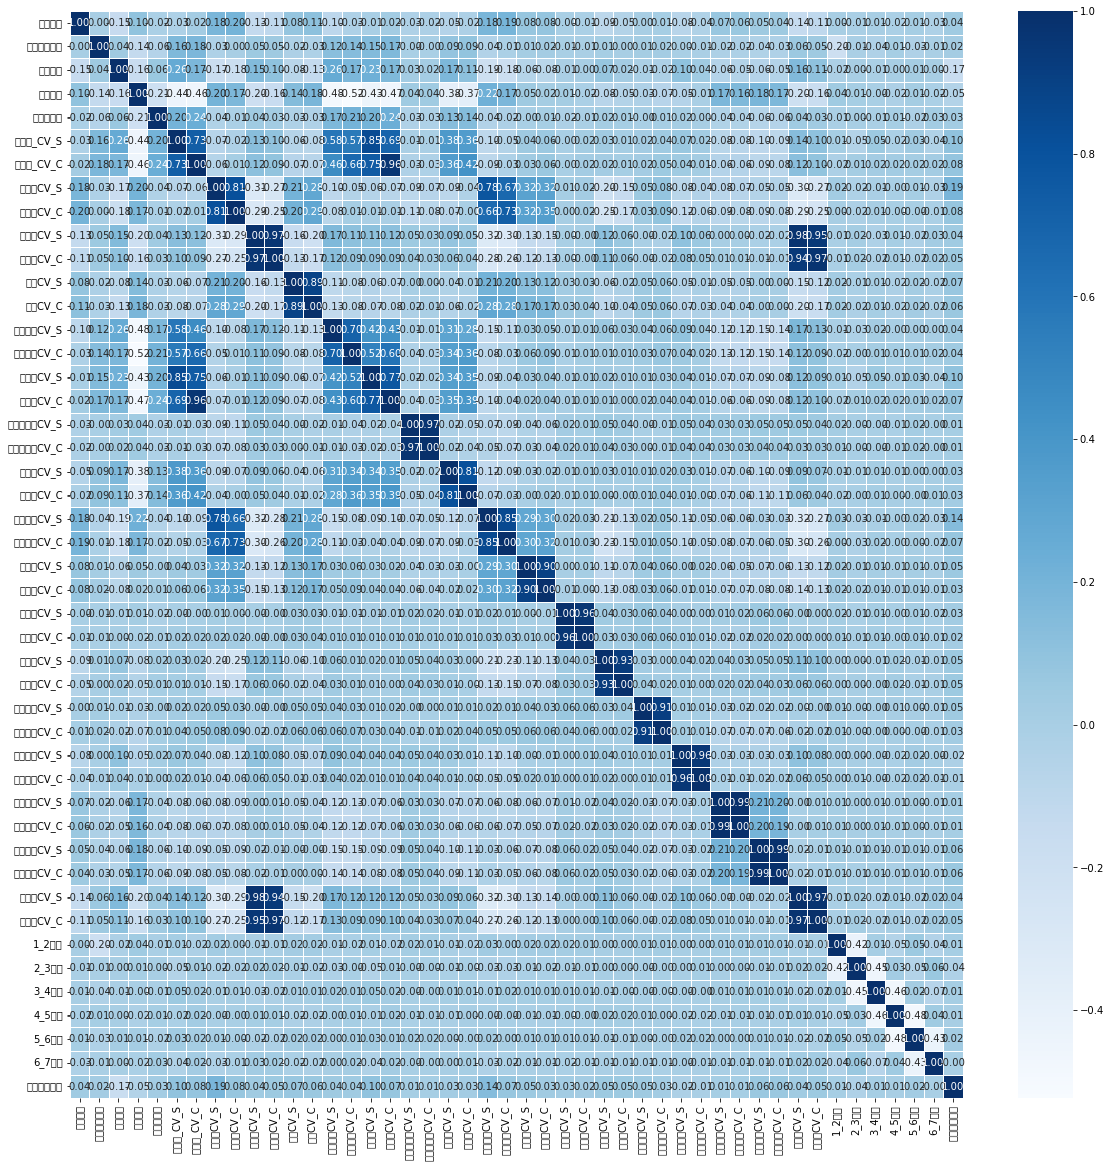

In [157]:
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(20,20))
sns.heatmap(data =df3.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [149]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=df3[['총구매액', '구매빈도',
       '최근구매일', '편의품_CV_S', '편의품_CV_C','선매품CV_S', '선매품CV_C', '전문품CV_S', '전문품CV_C', '기타CV_S',
       '기타CV_C','생활잡화CV_S', '생활잡화CV_C', '식료품CV_S', '식료품CV_C',
       '고급식료품CV_S', '고급식료품CV_C', '기호품CV_S', '기호품CV_C', '의류잡화CV_S', '의류잡화CV_C',
       '화장품CV_S', '화장품CV_C', '문구류CV_S', '문구류CV_C', '가구류CV_S', '가구류CV_C',
       '레저취미CV_S', '레저취미CV_C', '전자제품CV_S', '전자제품CV_C', '도서음반CV_S', '도서음반CV_C',
       '차량용품CV_S', '차량용품CV_C', '사치품CV_S', '사치품CV_C','객단가변동률','1_2증감', '2_3증감', '3_4증감', '4_5증감',
       '5_6증감', '6_7증감']]
Xsc = scaler.fit_transform(X)
Xsc

y=df[['분기증감확인']]
# DecisionTreeClassifier 정확도: 0.571
# RandomForestClassifier 정확도: 0.652
# LogisticRegression 정확도: 0.574
# lgbm 정확도: 0.670
# xgbm 정확도: 0.663

In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=df3[['총구매액', '구매빈도',
       '최근구매일', '편의품_CV_S', '편의품_CV_C','선매품CV_S', '선매품CV_C', '전문품CV_S', '전문품CV_C', '기타CV_S',
       '기타CV_C','생활잡화CV_S', '생활잡화CV_C', '식료품CV_S', '식료품CV_C',
       '고급식료품CV_S', '고급식료품CV_C', '기호품CV_S', '기호품CV_C', '의류잡화CV_S', '의류잡화CV_C',
       '화장품CV_S', '화장품CV_C', '문구류CV_S', '문구류CV_C', '가구류CV_S', '가구류CV_C',
       '레저취미CV_S', '레저취미CV_C', '전자제품CV_S', '전자제품CV_C', '도서음반CV_S', '도서음반CV_C',
       '차량용품CV_S', '차량용품CV_C', '사치품CV_S', '사치품CV_C']]
Xsc = scaler.fit_transform(X)
Xsc

y=df[['분기증감확인']]
# DecisionTreeClassifier 정확도: 0.544
# RandomForestClassifier 정확도: 0.600
# LogisticRegression 정확도: 0.565
# lgbm 정확도: 0.591
# xgbm 정확도: 0.599

In [29]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X=df[['1번품목구매비율(%)', '2번품목구매비율(%)',
#        '3번품목구매비율(%)', '4번품목구매비율(%)',
#       '1기구매비율(%)', '2기구매비율(%)', '3기구매비율(%)', '4기구매비율(%)', '5기구매비율(%)',
#        '6기구매비율(%)', '7기구매비율(%)', '8기구매비율(%)']]
# Xsc = scaler.fit_transform(X)
# Xsc

# y=df[['분기증감확인']]

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [151]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.3f}'.format(accuracy_score(y_test, dt_pred)))

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.3f}'.format(accuracy_score(y_test, rf_pred)))
                                                                  


lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))

lgbm_wrapper = LGBMClassifier(n_estimators=400)
evals = [(X_test,y_test)]
lgbm_wrapper.fit(X_train, y_train, eval_set=evals, verbose=False)
preds = lgbm_wrapper.predict(X_test)
print('lgbm 정확도: {:0.3f}'.format(accuracy_score(y_test, preds)))


evals = [(X_test,y_test)]
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train,y_train, early_stopping_rounds = 100, eval_set=evals, eval_metric='logloss', verbose=False)
w_preds = xgb_wrapper.predict(X_test)
print('xgbm 정확도: {:0.3f}'.format(accuracy_score(y_test, w_preds)))

DecisionTreeClassifier 정확도: 0.565
RandomForestClassifier 정확도: 0.639
LogisticRegression 정확도: 0.555
lgbm 정확도: 0.651
xgbm 정확도: 0.661


In [30]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

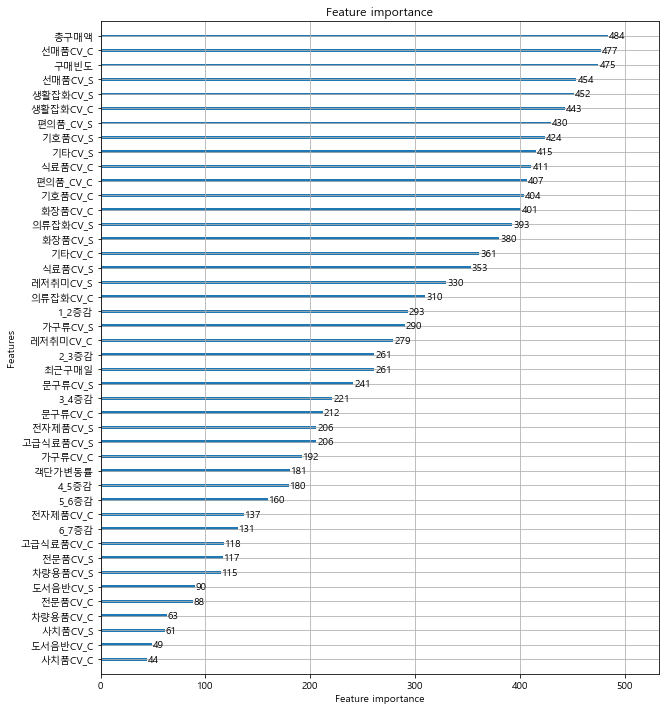

In [152]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper,ax=ax)

In [28]:
def get_clf_eval(y_test, y_pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred, pred_proba)

    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

k_model = KNeighborsClassifier(n_neighbors=40)
k_model.fit(X_train,y_train)
k_pred = k_model.predict(X_test)

k_accuracy = accuracy_score(y_test,k_pred)
print('KNN 예측 정확도:', k_accuracy)

KNN 예측 정확도: 0.5620031796502385


In [27]:
from sklearn import svm
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test,svm_pred)
print('svm 예측정확도:', svm_accuracy)

svm 예측정확도: 0.5715421303656598


In [65]:
import pandas as pd

from sklearn.ensemble import VotingClassifier

lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.7120
LogisticRegression 정확도: 0.7268
KNeighborsClassifier 정확도: 0.6746


In [33]:
female=pd.read_csv('여성등급.csv',encoding='cp949')
female

,고객번호,매출,여성등급
0,6142,102548.231418,1
1,16108,71700.122504,1
2,2323,69775.417236,1
3,6135,63177.578320,1
4,13189,57548.064344,1
...,...,...,...
15521,16836,39.861329,10
15522,1065,39.733286,10
15523,18333,39.049723,10
15524,17678,27.923161,10


In [44]:
df4 = pd.concat([df3,female],axis=1)

In [45]:
df4

,Unnamed: 0_x,고객번호,성별,연령대,거주지역,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,1번품목구매비율(%),2번품목구매비율(%),...,전자제품CV_C,도서음반CV_S,도서음반CV_C,차량용품CV_S,차량용품CV_C,사치품CV_S,사치품CV_C,고객번호,매출,여성등급
0,0,1,1,5,1,15.0,0.0,0.0,2.86,27.70,...,1.742835,0.000000,0.000000,0.000000,0.000000,1.356745,1.247219,6142.0,102548.231418,1.0
1,1,2,1,5,0,8.0,0.0,0.0,3.64,36.73,...,0.721569,0.000000,0.000000,0.000000,0.000000,2.099585,2.094437,16108.0,71700.122504,1.0
2,2,3,1,5,0,0.0,0.0,0.0,4.47,95.53,...,2.645751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2323.0,69775.417236,1.0
3,3,4,0,5,1,3.0,0.0,0.0,2.72,26.13,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.645751,2.645751,6135.0,63177.578320,1.0
4,4,6,0,5,3,0.0,0.0,0.0,4.99,45.59,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.282600,1.058301,13189.0,57548.064344,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,18861,19333,0,1,0,0.0,1.0,5.0,15.53,55.08,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
18862,18862,19334,1,2,3,30.0,1.0,0.0,13.88,66.70,...,2.645751,1.270026,1.376893,2.645751,2.645751,0.000000,0.000000,NaN,NaN,NaN
18863,18863,19335,0,2,0,0.0,1.0,0.0,16.72,53.31,...,0.000000,0.872815,0.810077,1.640665,1.376893,0.000000,0.000000,NaN,NaN,NaN
18864,18864,19336,0,2,1,0.0,0.0,0.0,10.66,30.64,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.398080,1.376893,NaN,NaN,NaN


In [46]:
df4=  df4.fillna(0)

In [34]:
df3 = pd.merge(df3,female, on='고객번호')
df3

,Unnamed: 0_x,고객번호,성별,연령대,거주지역,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,1번품목구매비율(%),2번품목구매비율(%),...,전자제품CV_S,전자제품CV_C,도서음반CV_S,도서음반CV_C,차량용품CV_S,차량용품CV_C,사치품CV_S,사치품CV_C,매출,여성등급
0,2,3,1,5,0,0.0,0.0,0.0,4.47,95.53,...,2.645751,2.645751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1011.972691,5
1,3,4,0,5,1,3.0,0.0,0.0,2.72,26.13,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.645751,2.645751,1424.961420,4
2,5,7,0,5,1,1.0,0.0,4.0,0.84,26.09,...,2.073081,1.835857,0.000000,0.000000,2.645751,2.645751,2.358062,1.631398,12227.983705,1
3,6,8,1,5,0,3.0,0.0,0.0,5.44,67.60,...,1.137616,0.721569,0.000000,0.000000,0.000000,0.000000,1.556723,1.417483,1119.729228,5
4,9,11,1,5,0,2.0,1.0,0.0,2.17,42.03,...,1.754454,1.325595,0.000000,0.000000,2.645751,2.645751,1.673112,1.707825,1051.538001,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15212,18459,18859,0,2,0,0.0,0.0,0.0,8.88,68.24,...,0.000000,0.000000,2.645751,2.645751,0.000000,0.000000,0.000000,0.000000,1070.482030,5
15213,18460,18860,1,4,1,0.0,0.0,0.0,3.22,59.50,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,848.150264,6
15214,18461,18861,0,4,1,0.0,0.0,0.0,10.49,75.20,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,279.519258,10
15215,18463,18863,0,4,0,0.0,0.0,0.0,5.06,65.69,...,1.725718,1.417483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,982.577096,6


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=df4[['1기구매등급', '2기구매등급','3기구매등급', '4기구매등급','5기구매등급', '6기구매등급', '7기구매등급', '총구매액', '구매빈도',
       '최근구매일', '편의품_CV_S', '편의품_CV_C','선매품CV_S', '선매품CV_C', '전문품CV_S', '전문품CV_C', '기타CV_S',
       '기타CV_C','생활잡화CV_S', '생활잡화CV_C', '식료품CV_S', '식료품CV_C',
       '고급식료품CV_S', '고급식료품CV_C', '기호품CV_S', '기호품CV_C', '의류잡화CV_S', '의류잡화CV_C',
       '화장품CV_S', '화장품CV_C', '문구류CV_S', '문구류CV_C', '가구류CV_S', '가구류CV_C',
       '레저취미CV_S', '레저취미CV_C', '전자제품CV_S', '전자제품CV_C', '도서음반CV_S', '도서음반CV_C',
       '차량용품CV_S', '차량용품CV_C', '사치품CV_S', '사치품CV_C','여성등급']]
Xsc = scaler.fit_transform(X)
Xsc

y=df[['분기증감확인']]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [49]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.3f}'.format(accuracy_score(y_test, dt_pred)))

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.3f}'.format(accuracy_score(y_test, rf_pred)))
                                                                  


lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))

lgbm_wrapper = LGBMClassifier(n_estimators=400)
evals = [(X_test,y_test)]
lgbm_wrapper.fit(X_train, y_train, eval_set=evals, verbose=False)
preds = lgbm_wrapper.predict(X_test)
print('lgbm 정확도: {:0.3f}'.format(accuracy_score(y_test, preds)))


evals = [(X_test,y_test)]
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train,y_train, early_stopping_rounds = 100, eval_set=evals, eval_metric='logloss', verbose=False)
w_preds = xgb_wrapper.predict(X_test)
print('xgbm 정확도: {:0.3f}'.format(accuracy_score(y_test, w_preds)))

DecisionTreeClassifier 정확도: 0.675
RandomForestClassifier 정확도: 0.750
LogisticRegression 정확도: 0.560
lgbm 정확도: 0.753
xgbm 정확도: 0.766


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

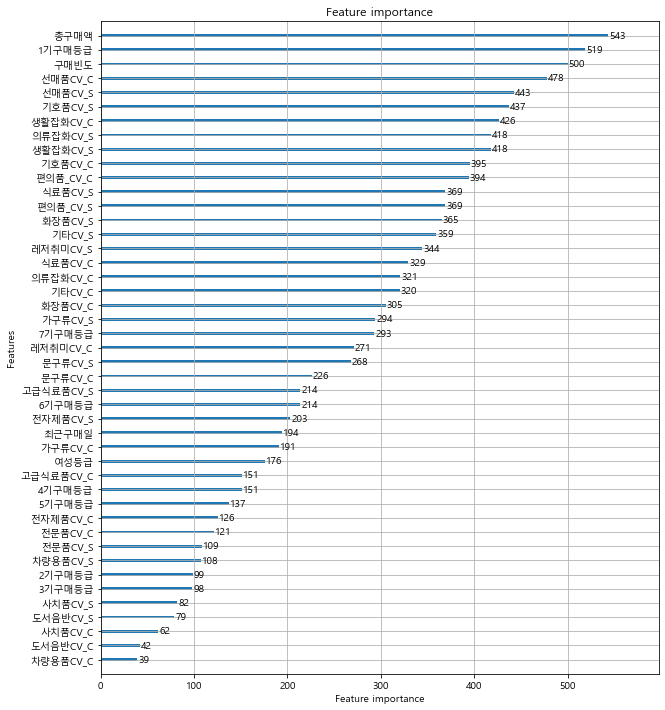

In [50]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper,ax=ax)

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

k_model = KNeighborsClassifier(n_neighbors=40)
k_model.fit(X_train,y_train)
k_pred = k_model.predict(X_test)

k_accuracy = accuracy_score(y_test,k_pred)
print('KNN 예측 정확도:', k_accuracy)

KNN 예측 정확도: 0.5514043455219926


In [53]:
from sklearn import svm
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test,svm_pred)
print('svm 예측정확도:', svm_accuracy)

svm 예측정확도: 0.5641229464758877


In [54]:
import pandas as pd

from sklearn.ensemble import VotingClassifier

lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.5480
LogisticRegression 정확도: 0.5599
KNeighborsClassifier 정확도: 0.5480
